In [1]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
features = pd.read_csv('../isot-ner.csv')
list(features.columns)

['Unnamed: 0',
 'TF',
 'Bigram TF',
 'No. of Stop_words',
 'Out of Context',
 'Arts, Culture, Entertainment, Sports',
 'Conspiracy',
 'Business and Industrial',
 'economy, business and finance',
 'Religion and belief',
 'Law, Government and Politics',
 'Education',
 'Technology and Computing',
 'Science',
 'Sixltr',
 'conj',
 'interrog',
 'number',
 'negemo',
 'social',
 'certain',
 'percept',
 'focuspast',
 'focuspresent',
 'time',
 'PERSON',
 'ORG',
 'GPE',
 'TIME']

In [3]:
df= pd.read_pickle('ISOT-dup.pkl')
list(df.columns)

['index',
 'title',
 'text',
 'subject',
 'date',
 'Label',
 'Clean_text',
 'TF_temp',
 'TF',
 'Bigram TF_temp',
 'Bigram TF',
 'No. of Stop_words',
 'Out of Context temp',
 'Out of Context',
 'bigram TF_temp',
 'bigram TF',
 'Textrazor_category',
 'Textrazor_topic',
 'Topics_category',
 'Topics_topic',
 'score_category',
 'score_topic',
 'topic_score_final',
 'topic_list_final',
 'bigram TF final',
 'arts, culture and entertainment',
 'Conspiracy',
 'crime, law and justice',
 'Criticism of journalism',
 'Advertising video on demand',
 'computing and information technology',
 'agriculture',
 'energy and resource',
 'economy, business and finance',
 'Harassment',
 'Cyberspace',
 'religion and belief',
 'Politics and technology',
 'Social media',
 'science and technology',
 'Social epistemology',
 'social issue',
 'environmental issue',
 'Academia',
 'Attacks',
 'Feminism',
 'Sports',
 'Internet-Cyberspace',
 'Science',
 'Sixltr',
 'conj',
 'interrog',
 'number',
 'negemo',
 'social',
 '

In [4]:
features.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38514 entries, 0 to 38513
Data columns (total 28 columns):
TF                                      38514 non-null int64
Bigram TF                               38514 non-null float64
No. of Stop_words                       38514 non-null float64
Out of Context                          38514 non-null int64
Arts, Culture, Entertainment, Sports    38514 non-null float64
Conspiracy                              38514 non-null float64
Business and Industrial                 38514 non-null float64
economy, business and finance           38514 non-null float64
Religion and belief                     38514 non-null float64
Law, Government and Politics            38514 non-null float64
Education                               38514 non-null float64
Technology and Computing                38514 non-null float64
Science                                 38514 non-null float64
Sixltr                                  38514 non-null float64
conj         

In [6]:
len(df)

38514

In [7]:
len(features)

38514

In [8]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
tokenizer= Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=" ")

sentences_train, sentences_test, y_train, y_test = train_test_split(
       df['text'].values, df['Label'].values, test_size=0.20, random_state=1000)

tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

In [9]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

123118


In [10]:
from statistics import mean 
train_lengths= [len(x) for x in X_train]
mean(train_lengths)

414.00311577034176

In [11]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 600
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [12]:
from keras.models import Sequential
from keras import layers
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional, TimeDistributed, Flatten
from keras.layers.recurrent import GRU, SimpleRNN
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
embedding_dim = 50

def Lstm():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(vocab_size,64,input_length=maxlen)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

def RNN():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(vocab_size,64,input_length=maxlen)(inputs)
    layer = SimpleRNN(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

def Gru():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(vocab_size,64,input_length=maxlen)(inputs)
    layer = GRU(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

def BiLSTM():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(vocab_size,64,input_length=maxlen)(inputs)
    layer =  Bidirectional (LSTM (100,return_sequences=True,dropout=0.50),merge_mode='concat')(layer)
    layer = TimeDistributed(Dense(100,activation='relu'))(layer)
    layer = Flatten()(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [13]:
#CREATE MODEL AND TRAIN
print("This is an LSTM Model: ")
lstm1 = Lstm()
lstm1.summary()
lstm1.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
lstm1.fit(X_train,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = lstm1.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = lstm1.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an LSTM Model: 
Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 600, 64)           7879552   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_____________________________

In [14]:
#CREATE MODEL AND TRAIN
print("This is an LSTM Model: ")
lstm2 = Lstm()
lstm2.summary()
lstm2.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
lstm2.fit(X_train,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = lstm2.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = lstm2.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an LSTM Model: 
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 600, 64)           7879552   
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None,

In [15]:
#CREATE MODEL AND TRAIN
print("This is an LSTM Model: ")
lstm3 = Lstm()
lstm3.summary()
lstm3.compile(loss='binary_crossentropy',optimizer=SGD(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
lstm3.fit(X_train,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = lstm3.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = lstm3.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an LSTM Model: 
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 600, 64)           7879552   
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None,

In [16]:
#CREATE MODEL AND TRAIN
print("This is an RNN Model: ")
rnn1 = RNN()
rnn1.summary()
rnn1.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
rnn1.fit(X_train,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = rnn1.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = rnn1.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an RNN Model: 
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 600, 64)           7879552   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 

In [17]:
#CREATE MODEL AND TRAIN
print("This is an RNN Model: ")
rnn2 = RNN()
rnn2.summary()
rnn2.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
rnn2.fit(X_train,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = rnn2.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = rnn2.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an RNN Model: 
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 600, 64)           7879552   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 

In [18]:
#CREATE MODEL AND TRAIN
print("This is an RNN Model: ")
rnn3 = RNN()
rnn3.summary()
rnn3.compile(loss='binary_crossentropy',optimizer=SGD(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
rnn3.fit(X_train,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = rnn3.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = rnn3.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an RNN Model: 
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 600, 64)           7879552   
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_11 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 

In [19]:
#CREATE MODEL AND TRAIN
print("This is an GRU Model: ")
gru1 = Gru()
gru1.summary()
gru1.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
gru1.fit(X_train,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = gru1.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = gru1.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an GRU Model: 
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 600, 64)           7879552   
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                24768     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 

In [20]:
#CREATE MODEL AND TRAIN
print("This is an GRU Model: ")
gru2 = Gru()
gru2.summary()
gru2.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
gru2.fit(X_train,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = gru2.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = gru2.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an GRU Model: 
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 600, 64)           7879552   
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                24768     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 

In [21]:
#CREATE MODEL AND TRAIN
print("This is an GRU Model: ")
gru3 = Gru()
gru3.summary()
gru3.compile(loss='binary_crossentropy',optimizer=SGD(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
gru3.fit(X_train,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = gru3.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = gru3.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an GRU Model: 
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 600, 64)           7879552   
_________________________________________________________________
gru_3 (GRU)                  (None, 64)                24768     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_17 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 

In [22]:
#CREATE MODEL AND TRAIN
print("This is an Bi-Directional LSTM Model: ")
BiLSTM1 = BiLSTM()
BiLSTM1.summary()
BiLSTM1.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
BiLSTM1.fit(X_train,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = BiLSTM1.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = BiLSTM1.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an Bi-Directional LSTM Model: 
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 600, 64)           7879552   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 600, 200)          132000    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 600, 100)          20100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 60000)             0         
_________________________________________________________________
FC1 (Dense)                  (None, 256)               15360256  
_________________________________________________________________
activation_19 (Acti

In [23]:
#CREATE MODEL AND TRAIN
print("This is an Bi-Directional LSTM Model: ")
BiLSTM2 = BiLSTM()
BiLSTM2.summary()
BiLSTM2.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
BiLSTM2.fit(X_train,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = BiLSTM2.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = BiLSTM2.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an Bi-Directional LSTM Model: 
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_11 (Embedding)     (None, 600, 64)           7879552   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 600, 200)          132000    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 600, 100)          20100     
_________________________________________________________________
flatten_2 (Flatten)          (None, 60000)             0         
_________________________________________________________________
FC1 (Dense)                  (None, 256)               15360256  
_________________________________________________________________
activation_21 (Acti

In [24]:
#CREATE MODEL AND TRAIN
print("This is an Bi-Directional LSTM Model: ")
BiLSTM3 = BiLSTM()
BiLSTM3.summary()
BiLSTM3.compile(loss='binary_crossentropy',optimizer=SGD(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
BiLSTM3.fit(X_train,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = BiLSTM3.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = BiLSTM3.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an Bi-Directional LSTM Model: 
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_12 (Embedding)     (None, 600, 64)           7879552   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 600, 200)          132000    
_________________________________________________________________
time_distributed_3 (TimeDist (None, 600, 100)          20100     
_________________________________________________________________
flatten_3 (Flatten)          (None, 60000)             0         
_________________________________________________________________
FC1 (Dense)                  (None, 256)               15360256  
_________________________________________________________________
activation_23 (Acti

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


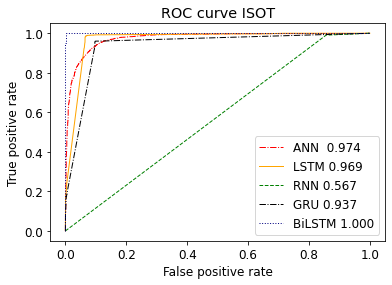

In [26]:
from sklearn import  metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import pickle
#LSTM
y_pred_lstm = lstm1.predict(X_test)
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_test, y_pred_lstm)
auc_lstm = auc(fpr_lstm, tpr_lstm)
#RNN
y_pred_rnn = rnn2.predict(X_test)
y_pred_rnn =(y_pred_rnn>0.5)*(np.ones(y_pred_rnn.shape))
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(y_test, y_pred_rnn)
auc_rnn = auc(fpr_rnn, tpr_rnn)
#GRU
y_pred_gru = gru1.predict(X_test)
fpr_gru, tpr_gru, thresholds_gru = roc_curve(y_test, y_pred_gru)
auc_gru = auc(fpr_gru, tpr_gru)
#Bi-LSTM
y_pred_BiLSTM = BiLSTM1.predict(X_test)
fpr_BiLSTM, tpr_BiLSTM, thresholds_BiLSTM = roc_curve(y_test, y_pred_BiLSTM)
auc_BiLSTM = auc(fpr_BiLSTM, tpr_BiLSTM)

# plt.figure(1)
fig=pickle.load(open('ROC_ISOT.pickle', 'rb'))
# ax = plt.subplot(111)
plt.plot(fpr_lstm, tpr_lstm, label='LSTM {:.3f}'.format(auc_lstm), color='orange', linestyle='-', linewidth=1)
plt.plot(fpr_rnn, tpr_rnn, label='RNN {:.3f}'.format(auc_rnn), color='green', linestyle='--', linewidth=1)
plt.plot(fpr_gru, tpr_gru, label='GRU {:.3f}'.format(auc_gru), color='black', linestyle='-.', linewidth=1)
plt.plot(fpr_BiLSTM, tpr_BiLSTM, label='BiLSTM {:.3f}'.format(auc_BiLSTM), color='navy', linestyle=':', linewidth=1)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve ISOT')
plt.legend(loc='best')
# pickle.dump(fig, open('ROC_Liar-Liar.pickle', 'wb'))
plt.savefig('ROC_ISOT.eps')
plt.show()



In [8]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words=set(stopwords.words('english'))
lemma=WordNetLemmatizer()

def clean_review(review_text):
    review_text=re.sub(r'http\S+', ' ',review_text) #Removing url
    review_text=re.sub(r'[^a-zA-Z]', ' ',review_text) #Removing Numbers and Punctuation
    review_text= str(review_text).lower()   #Lower casing the sentence
    review_text= word_tokenize(review_text)    #Tokenization
    review_text = [item for item in review_text if item not in stop_words]  # Removing stop_words
    review_text = [lemma.lemmatize(word=w, pos= 'v') for w in review_text]       #Lemmatization
    review_text= [i for i in review_text if len(i)>3]     #Removing small length words
    review_text = ' '.join(review_text)     #converting back to string
    return review_text
    

In [9]:
df.head()

,index,title,text,subject,date,Label,Clean_text,TF_temp,TF,Bigram TF_temp,...,social,certain,percept,focuspast,focuspresent,time,"Arts, Culture, Entertainment, Sports",Business and Industrial,"Law, Government and Politics",religion & social epistemology
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump wish americans happy new year lea...,0.914229,44,,...,10.52,1.79,1.39,2.78,7.14,10.91,0.0000,0.0,0.563400,0.0000
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,house intelligence committee chairman devin nu...,0.967192,29,,...,7.91,0.32,2.22,5.38,2.85,6.33,0.0000,0.0,0.554200,0.0000
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,"friday , revealed former milwaukee sheriff dav...",0.935128,60,,...,10.78,0.65,5.07,3.10,5.23,6.54,0.0000,0.0,0.470700,0.0000
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,"christmas day , donald trump announced would b...",0.933978,39,,...,6.90,2.09,3.56,3.35,7.32,7.53,0.4637,0.0,0.563400,0.0000
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope francis used annual christmas day message...,0.963308,31,,...,13.74,0.71,3.08,4.50,8.06,4.27,0.0000,0.0,0.543475,0.6098


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


17324


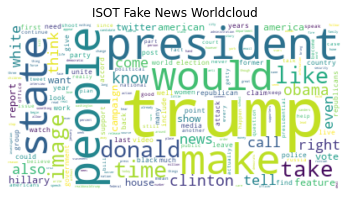

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df['CleanReview']=df['text'].apply(clean_review)
text=""
print(len(df[df['Label']==0]))
for sentence in list(df[df['Label']==0]['CleanReview']):
    text= text + ' ' + sentence
# filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
# text=text.lower()
# for i in filters:
#     text=text.replace(i, ' ')
text_tokens = word_tokenize(text)
# tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

wordfreq = {}
for word in text_tokens:
    wordfreq[word] = wordfreq.setdefault(word, 0) + 1
    


wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=wordfreq)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('ISOT Fake News Worldcloud')
fig = plt.gcf()
fig.savefig('ISOT-Fake.eps',transparent=False, bbox_inches='tight', dpi=300)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


21190


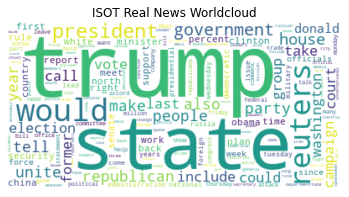

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df['CleanReview']=df['text'].apply(clean_review)
text=""
print(len(df[df['Label']==1]))
for sentence in list(df[df['Label']==1]['CleanReview']):
    text= text + ' ' + sentence
# filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
# text=text.lower()
# for i in filters:
#     text=text.replace(i, ' ')
text_tokens = word_tokenize(text)
# tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

wordfreq = {}
for word in text_tokens:
    wordfreq[word] = wordfreq.setdefault(word, 0) + 1
    


wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=wordfreq)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('ISOT Real News Worldcloud')
fig = plt.gcf()
fig.savefig('ISOT-Real.eps',transparent=False, bbox_inches='tight', dpi=300)
plt.show()